### Practice sklearn and matplot 
 - Following https://www.kaggle.com/netzone/loan-data-eda-simple-model

In [1]:
import os
import numpy as np
import pandas as pd
import datetime 
import seaborn as sns
sns.set_style("dark")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
loan_data = pd.read_csv('data\\Loan payments data.csv')
loan_data.shape

(500, 11)

In [3]:
loan_data.tail(2)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female
499,xqd20160500,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/19/2016 11:58,8.0,28,High School or Below,male


In [4]:
loan_data.info()
# there are two variables that have missing values - paid_off_time, past_due_days

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           500 non-null object
loan_status       500 non-null object
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null object
due_date          500 non-null object
paid_off_time     400 non-null object
past_due_days     200 non-null float64
age               500 non-null int64
education         500 non-null object
Gender            500 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 43.0+ KB


In [5]:
print(loan_data.loan_status.unique())
# this is the variable that we'll try to predict

['PAIDOFF' 'COLLECTION' 'COLLECTION_PAIDOFF']


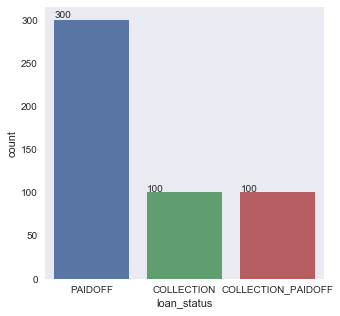

In [6]:
fig = plt.figure(figsize=(5,5))
ax = sns.countplot(loan_data.loan_status)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()),',d')),(p.get_x()*1,p.get_height()*1.01))
plt.show()

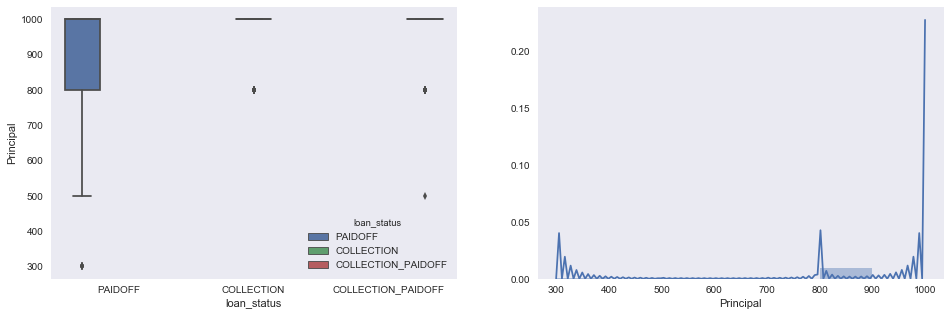

In [7]:
# boxplot of Principal as a function of loan status
# and histogram of Principal
fig, axs = plt.subplots(1,2,figsize=(16,5))
sns.boxplot(x = 'loan_status', y = 'Principal',data=loan_data, hue = 'loan_status', ax=axs[0])
sns.distplot(loan_data.Principal, bins=range(300,1000,100), ax =axs[1],kde=True)
plt.show()

In [8]:
loan_data.groupby(['loan_status','Principal']).Loan_ID.count()

loan_status         Principal
COLLECTION          800           23
                    1000          77
COLLECTION_PAIDOFF  500            1
                    800           19
                    1000          80
PAIDOFF             300            6
                    500            2
                    700            1
                    800           69
                    900            2
                    1000         220
Name: Loan_ID, dtype: int64

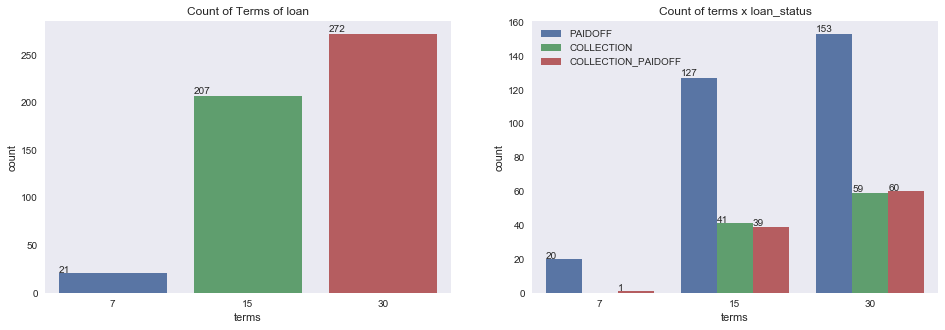

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(16,5))
sns.countplot(loan_data.terms, ax=axs[0])
axs[0].set_title("Count of Terms of loan")
for p in axs[0].patches:
    axs[0].annotate(str(format(int(p.get_height()), ',d')), 
                    (p.get_x(), p.get_height()*1.01))
sns.countplot(x='terms',hue='loan_status',data=loan_data, ax=axs[1])
axs[1].set_title("Count of terms x loan_status")
for p in axs[1].patches:    
    if (np.isnan(float(p.get_height()))):  # there are nan's
        value=0
    else:
        value = p.get_height()
    axs[1].annotate(str(format(int(value),'d')),
                    (p.get_x(),p.get_height()*1.01))
axs[1].legend(loc='upper left')
plt.show()

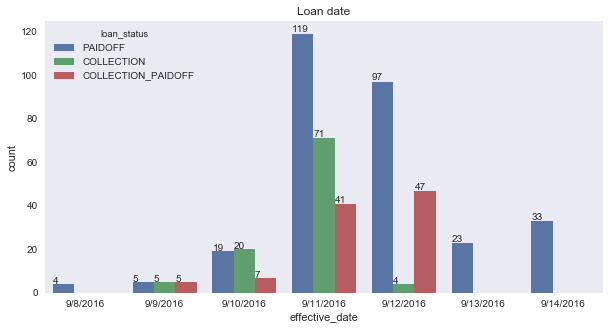

In [10]:
# plot loan_status CNT as a function of effective_date 
fig = plt.figure(figsize=(10,5))
ax = sns.countplot(x='effective_date',hue='loan_status',data=loan_data)
ax.set_title('Loan date')
for p in ax.patches:
    if (np.isnan(float(p.get_height()))):
        value=0
    else:
        value=p.get_height()
    ax.annotate(str(format(int(value),'d')),
                (p.get_x(),p.get_height()*1.01))
plt.show()

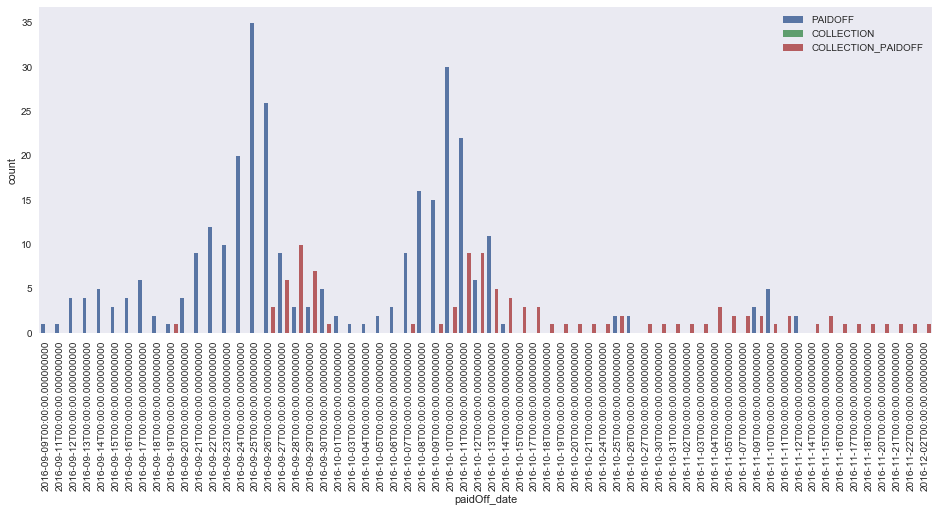

In [11]:
loan_data['paidOff_date']=pd.DatetimeIndex(loan_data.paid_off_time).normalize()
fig = plt.figure(figsize=(16,6))
ax = sns.countplot(x = 'paidOff_date',hue='loan_status', data=loan_data)
ax.legend(loc='upper right')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [12]:
# Compute the day to pay-off the loan
loan_data['day_to_pay'] = (pd.DatetimeIndex(loan_data.paid_off_time).normalize() - 
                           pd.DatetimeIndex(loan_data.effective_date).normalize()) / np.timedelta64(1, 'D')

In [13]:
loan_data.day_to_pay.head()

0     6.0
1    29.0
2    17.0
3    14.0
4    14.0
Name: day_to_pay, dtype: float64

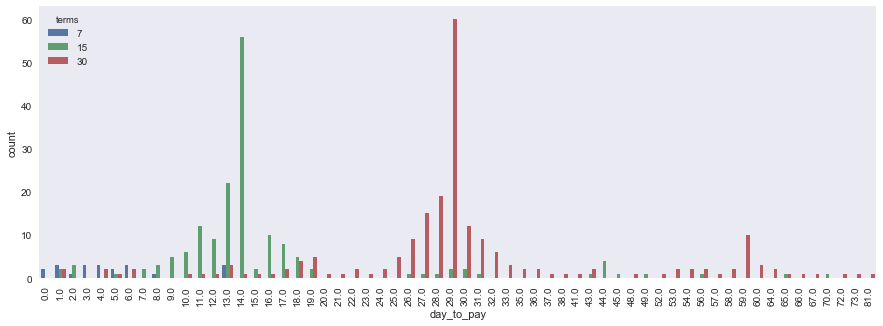

In [14]:
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(x='day_to_pay',hue = 'terms', data=loan_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

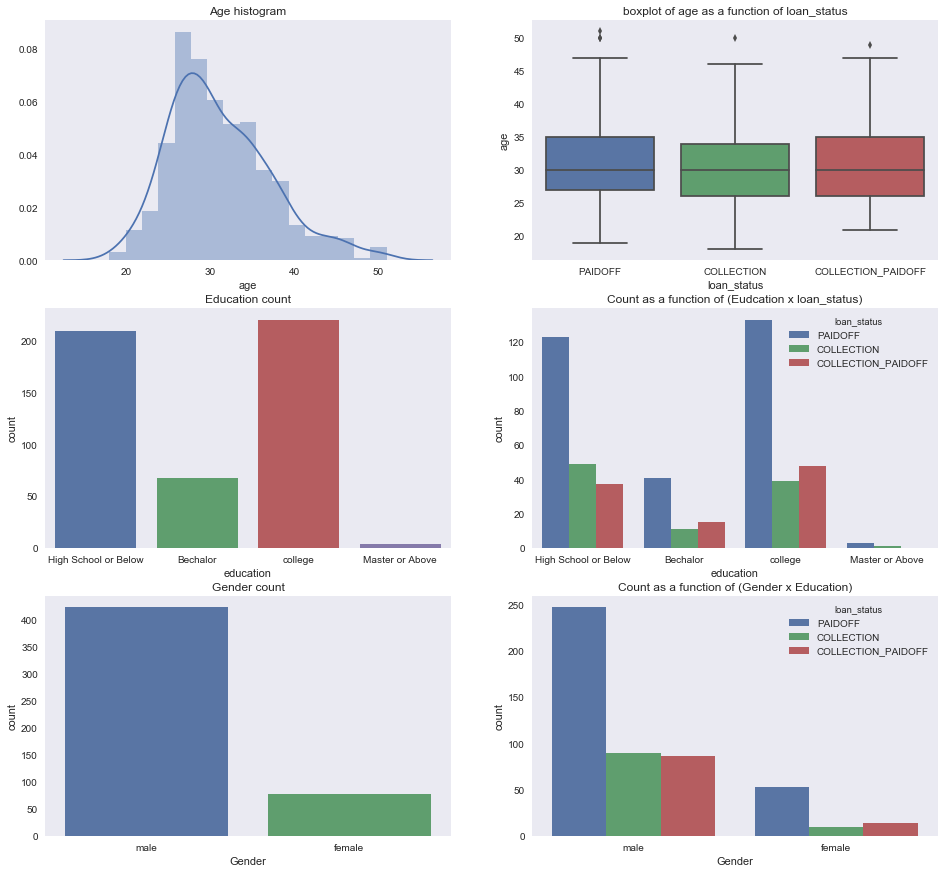

In [15]:
# age, education, and gender
fig, axs = plt.subplots(3,2,figsize=(16,15))
sns.distplot(loan_data.age, ax=axs[0][0])
axs[0][0].set_title('Age histogram')
sns.boxplot(x='loan_status',y='age',data=loan_data,ax=axs[0][1])
axs[0][1].set_title('boxplot of age as a function of loan_status')

sns.countplot(x='education',data=loan_data, ax=axs[1][0])
axs[1][0].set_title('Education count')
sns.countplot(x='education',hue='loan_status',data=loan_data, ax=axs[1][1])
axs[1][1].set_title('Count as a function of (Eudcation x loan_status)')
sns.countplot(x='Gender',data=loan_data, ax=axs[2][0])
axs[2][0].set_title('Gender count')
sns.countplot(x='Gender',hue='loan_status',data=loan_data, ax=axs[2][1])
axs[2][1].set_title('Count as a function of (Gender x Education)')
plt.show()

In [16]:
pd.crosstab(loan_data.loan_status, loan_data.Gender + "_" + loan_data.education)

col_0,female_Bechalor,female_High School or Below,female_college,male_Bechalor,male_High School or Below,male_Master or Above,male_college
loan_status,,,,,,,
COLLECTION,0,7,3,11,42,1,36
COLLECTION_PAIDOFF,1,5,8,14,32,0,40
PAIDOFF,12,19,22,29,104,3,111


In [17]:
pd.crosstab(loan_data.loan_status, loan_data.Gender + "_" + loan_data.education, 
            margins=True, normalize='columns')

col_0,female_Bechalor,female_High School or Below,female_college,male_Bechalor,male_High School or Below,male_Master or Above,male_college,All
loan_status,,,,,,,,
COLLECTION,0.000000,0.225806,0.090909,0.203704,0.235955,0.25,0.192513,0.2
COLLECTION_PAIDOFF,0.076923,0.161290,0.242424,0.259259,0.179775,0.00,0.213904,0.2
PAIDOFF,0.923077,0.612903,0.666667,0.537037,0.584270,0.75,0.593583,0.6


### Question: Who will likely to pay the loan off on time?

In [18]:
loan_data.loc[(loan_data.loan_status=='PAIDOFF') & (loan_data.day_to_pay>30)
              ,'loan_status']='COLLECTION_PAIDOFF'

In [19]:
loan_data['status']=loan_data['loan_status'].map({'PAIDOFF':1,
                                                  'COLLECTION_PAIDOFF':2,'COLLECTION':2})

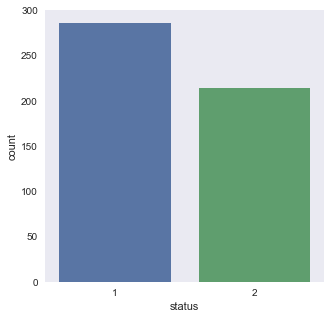

In [20]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='status',data=loan_data)

Convert education and gender to dummy variables

In [21]:
gender_dummies = pd.get_dummies(loan_data.Gender,prefix='is_').iloc[:,1:]
loan_data=pd.concat([loan_data,gender_dummies],axis=1)

In [22]:
edu_dummies = pd.get_dummies(loan_data.education,prefix='is_').iloc[:,1:]
loan_data = pd.concat([loan_data,edu_dummies],axis=1)

In [23]:
loan_data.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender', 'paidOff_date', 'day_to_pay', 'status', 'is__male',
       'is__High School or Below', 'is__Master or Above', 'is__college'],
      dtype='object')

Use the following features: Principal, terms, age, "is_male", "is_education" to predict loan_status

In [24]:
feature_col = ['Principal','terms','age','is__male','is__High School or Below','is__Master or Above','is__college']
X = loan_data.loc[:,feature_col]
y = loan_data.loc[:,'status']

In [25]:
# ML library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

### RandomForestClassifier

In [26]:
est_array = np.array([1,5,10,50,100,200,500]) 
accuracy = np.zeros((len(est_array),len(range(0,10,1))))
for c in range(0,len(est_array),1):
    rf_class = RandomForestClassifier(n_estimators = est_array[c])
    for cv in range(0,10,1): #cross validation        
        trainX, testX, trainY, testY = train_test_split(X, y, train_size = 0.8, random_state=cv*9)
        rf_class.fit(trainX,trainY)        
        accuracy[c,cv] = rf_class.score(testX,testY)

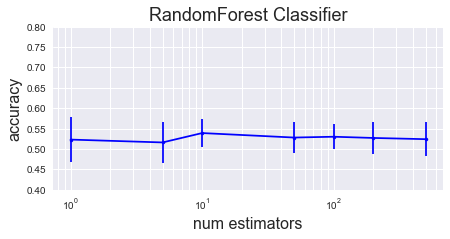

In [27]:
M = accuracy.mean(axis=1)
std = accuracy.std(axis=1)
fig = plt.figure(figsize=(7,3))
plt.errorbar(est_array, M, yerr=std, fmt='b.-')
plt.xscale("log")
plt.ylim(0.40,0.80)
plt.xlabel("num estimators", size=16)
plt.ylabel("accuracy", size=16)
plt.title("RandomForest Classifier", size=18)
plt.grid(which="both")
plt.show()

### SVM (linear)

In [28]:
C_array = np.array([0.1, 0.5, 1, 5, 10])
accuracy = np.zeros((len(C_array),len(range(0,10,1))))
for c in range(0,len(C_array),1):
    svc_class = svm.SVC(kernel='linear',random_state=1, C=C_array[c])
    for cv in range(0,10,1): #10-fold cross validation
        trainX, testX, trainY, testY = train_test_split(X, y, train_size = 0.8, random_state=cv*9)
        svc_class.fit(trainX,trainY)        
        accuracy[c,cv]=svc_class.score(testX,testY)

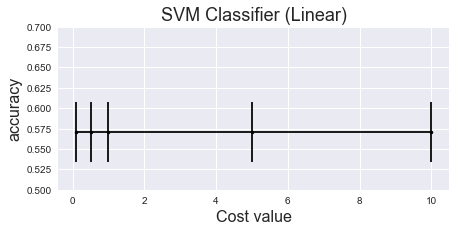

In [29]:
M = accuracy.mean(axis=1)
std = accuracy.std(axis=1)
fig = plt.figure(figsize=(7,3))
plt.errorbar(C_array,M,yerr=std, fmt='k.-')
plt.ylim(0.50,0.70)
plt.xlabel("Cost value", size=16)
plt.ylabel("accuracy", size=16)
plt.title("SVM Classifier (Linear)", size=18)
plt.grid(which="both")
plt.show()

### SVM (RBF)

In [30]:
gamma_array = np.array([0.001, 0.01, 0.1, 1, 10])
accuracy = np.zeros((len(C_array),len(range(0,10,1))))
for c in range(0,len(C_array),1):
    svc_class = svm.SVC(kernel='rbf',random_state=1, gamma = gamma_array[c])
    for cv in range(0,10,1): #10-fold cross validation
        trainX, testX, trainY, testY = train_test_split(X, y, train_size = 0.8, random_state=cv*9)
        svc_class.fit(trainX,trainY)        
        accuracy[c,cv]=svc_class.score(testX,testY)

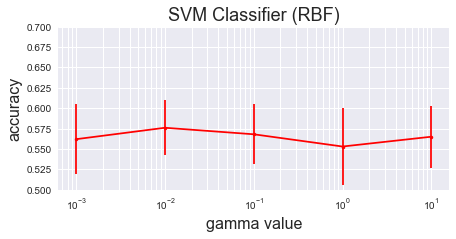

In [31]:
M = accuracy.mean(axis=1)
std = accuracy.std(axis=1)
fig = plt.figure(figsize=(7,3))
plt.errorbar(gamma_array,M,yerr=std, fmt='r.-')
plt.ylim(0.50,0.70)
plt.xscale('log')
plt.xlabel("gamma value", size=16)
plt.ylabel("accuracy", size=16)
plt.title("SVM Classifier (RBF)", size=18)
plt.grid(which="both")
plt.show()